In [1]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()

In [3]:
print(torch.version.cuda)


11.7


In [2]:
torch.cuda.memory_allocated()

0

In [4]:
from pynvml import *
nvmlInit()
h = nvmlDeviceGetHandleByIndex(0)
info = nvmlDeviceGetMemoryInfo(h)
print(f'total    : {info.total}')
print(f'free     : {info.free}')
print(f'used     : {info.used}')

total    : 4294967296
free     : 61288448
used     : 4233678848


In [3]:
t = torch.cuda.get_device_properties(0).total_memory
r = torch.cuda.memory_reserved(0)
a = torch.cuda.memory_allocated(0)
r-a  # free inside reserved

0

In [1]:
import torch
torch.cuda.is_available()

True

calculate distr from pkl

In [3]:
import numpy as np
import pickle
p = "../handler/data/pickled/0.2x5DHfL/eegAndStage.No_Hf_l_1.pkl"
with open(p,"rb") as f:
    (eeg, emg, stageSeq, timeStamps) = pickle.load(f)
eeg = eeg.reshape(-1,512)
pred = "../results/predictlabels/W6193T_predictOnDel.pickle"
with open(pred,"rb") as f:
    x = pickle.load(f)

In [11]:
# neeg = []
# for i in range(len(eeg)):
#     if stageSeq[i] == "H":
#         neeg.append(eeg[i])
neeg = []
for i in range(len(eeg)):
    if stageSeq[i] == "H" and x[i] =="l":
        neeg.append(eeg[i])

In [32]:
import mne
neeg = np.array(neeg)
lpsd, lfreqs = mne.time_frequency.psd_array_multitaper(neeg,sfreq=128,fmin=1,fmax=12)

    Using multitaper spectrum estimation with 7 DPSS windows


In [33]:
def critical_point(psd, f):# return the 0.5 point of freq cumulation
    psd = psd.flatten()
    f = f.flatten()
    max_ind = 1
    max_cp = 0
    for cp in range(len(f)):
        l = np.sum(psd[:cp])
        h = np.sum(psd[cp:])
        h_ind = abs((h-l)/(h+l))

        if h_ind < max_ind:
            max_ind = h_ind
            max_cp = cp

    return f[max_cp]
#ratio over 6 in LTW
ct = []
for i in lpsd:
    ct.append(critical_point(i, lfreqs))

d = {x: ct.count(x) for x in ct}
data = (dict(sorted(d.items())))
# print(dict(sorted(d.items())))
sum_over_6 = sum([value for key, value in data.items() if key >= 6])
total_sum = sum(data.values())

result = sum_over_6 / total_sum

print(result)

0.6508379888268156


<BarContainer object of 19 artists>

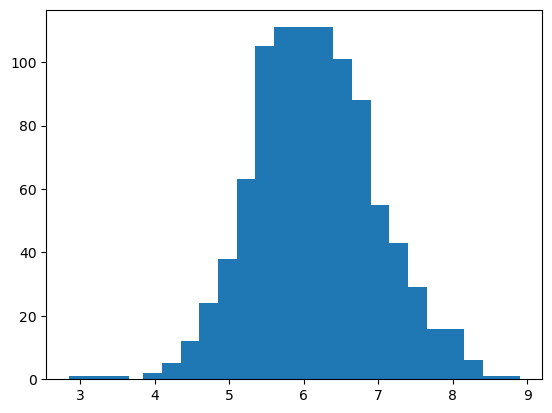

In [37]:
import matplotlib.pyplot as plt

f = d.keys()
n = d.values()
plt.bar(f, n, label="{}".format("H=>L"),alpha=1)

.

In [6]:
import numpy as np
import pickle
featurePath = "run/85J254predict.pickle"
featureFileHandler = open(featurePath, 'rb')
features = pickle.load(featureFileHandler)
features = [x.upper() if x!= "n" else "S" for x in features]

In [9]:
set(features)

{'?', 'H', 'L', 'R', 'S'}

split trained files and predict

In [ ]:
import os,shutil
for f in os.listdir("../data/finalclassifier/"):
    if "files_used_for_training" in f:
        filename = "../data/finalclassifier/" + f #"files_used_for_training.0C4JN8.csv"  # Replace with the actual filename
        #new folder
        id = filename.strip().split("/")[-1].split(".")[-2]
        new_path = "../data/file4pre/"+id
        if not os.path.exists(new_path):
            os.makedirs(new_path)
        string_to_extract = ""
        l_t = []


        with open(filename, "r") as file:
            for line in file:
                fields = line.strip().split(",")
                string_to_extract = fields[2]
                l_t.append(string_to_extract)
                # print(string_to_extract)
        a = []
        all_path ="C:/Users/SSG Lab/Desktop/utsn/A_128Hz4sec4stage"

        for f in os.listdir(all_path):
            if "raf" in f: 
                a.append(f.strip().split(".")[0])
        diff = set(a) - set(l_t)
        for i in diff:
            if os.path.isfile(all_path+"/"+i+".csv") : 
                print(i)   
                shutil.copy(all_path+"/"+i+".csv",new_path+"/"+i+".csv")

        


labels for pre part

In [ ]:
import os,shutil
for f in os.listdir("../data/finalclassifier/"):
    if "files_used_for_training" in f:
        filename = "../data/finalclassifier/" + f #"files_used_for_training.0C4JN8.csv"  # Replace with the actual filename
        #new folder
        id = filename.strip().split("/")[-1].split(".")[-2]
        new_path = "../data/label4pre/"+id
        if not os.path.exists(new_path):
            os.makedirs(new_path)
        string_to_extract = ""
        l_t = []


        with open(filename, "r") as file:
            for line in file:
                fields = line.strip().split(",")
                string_to_extract = fields[2]
                l_t.append(string_to_extract)
                # print(string_to_extract)
        a = []
        all_path ="C:/Users/SSG Lab/Desktop/utsn/A_128Hz4sec4stage"

        for f in os.listdir(all_path):
            if "raf" in f: 
                a.append(f.strip().split(".")[0])
        diff = set(a) - set(l_t)
        for i in diff:
            if os.path.isfile(all_path+"/"+i+"_Trend.csv") : 
                print(i)   
                shutil.copy(all_path+"/"+i+"_Trend.csv",new_path+"/"+i+"_Trend.csv")

        


In [ ]:
import sys
# sys.path.insert(0,"..")
print(sys.path)
print("---------------------------------------------------------")
from utils.dataReader import DataReader
import matplotlib.pyplot as plt
dataReader = DataReader()
# dataReader.readAll(sys)
#readOfflineEEGandStageLabels2pickle.py reads text files containing EEG raw data signals and ground truth stage labels from the WAVEDIR directory. It writes files starting with "eegAndStage" into the "data/pickled" directory. These files are in Python's pickle format to enable faster access.


In [ ]:
dc = {"a":1,"b":2,"c":3}
ls = [3,2,4,6]
ls[:2]

In [ ]:
import numpy as np
data,m, t = dataReader.readEEG("../data/sampledata/Raw/D1798_short.txt")
data = np.array(data).reshape(1, -1)      
# raw = mne.io.RawArray(data, inf)      
data.shape

AttributeError: module 'torch' has no attribute 'cuda'

### mne

In [ ]:
import mne

eegSegment = data[0][:128*4]
sfreq = 128
nperseg = 256

# Create MNE RawArray object from EEG data
raw = mne.io.RawArray(eegSegment.reshape(1, -1), info=mne.create_info(['EEG'], sfreq, 'eeg'))
raw.compute_psd(fmin =1,fmax =12).get_data()#.plot()
# raw

In [ ]:
import mne

eegSegment = data[0][:128*4]
sfreq = 128
nperseg = 256

# Create MNE RawArray object from EEG data
# raw = mne.io.RawArray(eegSegment.reshape(1, -1), info=mne.create_info(ch_names=['EEG'], sfreq=sfreq))
seg = eegSegment.reshape((1,-1))
seg.shape
# Apply STFT
frequencies = mne.time_frequency.stft(seg, wsize=nperseg)
fr = frequencies[0]
f = np.sum(abs(fr),axis = 1)
plt.plot(f)

In [ ]:
import matplotlib.pyplot as plt
plt.pcolormesh(segment_times, freqs, np.abs(Zxx),  # shading='gouraud'
               )
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.ylim(fmin, fmax)
plt.colorbar()
plt.tight_layout()
plt.show()


In [ ]:
def filtering(Zxx, freqs, lowerFreq, upperFreq):
        zipped = list(filter(lambda x: lowerFreq <=
                      x[1] and x[1] < upperFreq, zip(Zxx, freqs)))
        return np.array([e[0] for e in zipped]), np.array([e[1] for e in zipped])

def binning(Zxx, freqs, freqBinNum):
    binSize = np.int(np.floor(1.0 * len(Zxx) / freqBinNum))
    Zxx_binned = np.array([np.sum(np.abs(Zxx[(binID*binSize):((binID+1)*binSize)]),axis=0) for binID in range(freqBinNum)])
    freqs_binned = np.array([np.mean(freqs[(binID*binSize):((binID+1)*binSize)],axis=0) for binID in range(freqBinNum)])
    return Zxx_binned, freqs_binned

In [ ]:
a = [i for i in range(5)]
print(a[:3])

In [ ]:
def oneHot2stageLabel(oneHot, stageLabels4evaluation, stageLabel2stageID):
    # print('in oneHot2stageLabel, oneHot.shape = ' + str(oneHot.shape))
    # keyList = [keys for keys in params.stageLabel2stageID.keys()]
    # print('keyList = ' + str(keyList))
    stageID = np.argmax(oneHot)
    for key in stageLabels4evaluation:
        if stageLabel2stageID[key] == stageID:
            return key
    return '-'

labelCorrectionDict = {'S' : 'n', 'W' : 'w', 'R' : 'r', 'H' :'h', 'RW' : 'w', 'M' : 'm', 'P' : 'P', 'F2' : 'F2', '?' : '?', '-' : '-'}

stageLabels4evaluation = orig_stageLabels[:self.maximumStageNum]
stageLabel2stageID = {stage: stageID for stage, stageID in zip(
    orig_stageLabels[:self.maximumStageNum], range(self.maximumStageNum))}

def correct_label(items):
    return labelCorrectionDict[oneHot2stageLabel(items[0], stageLabels4evaluation, stageLabel2stageID)]

if self.params.classifierType == 'deep':
    if type(y_pred_modified) != list and type(y_pred_modified) != np.ndarray:
        if y_pred_modified == '?':
            y_pred = y_pred_modified
        else:
            y_pred = correct_label(y_pred_modified)
    else:
        y_pred = correct_label(y_pred_modified)
    # print('after labelCorrection, y_pred =', y_pred)
    # print('y_pred = ' + str(y_pred))
else:
    y_pred = self.params.labelCorrectionDict[y_pred_modified[0]]

# print(y_pred, end='')
self.pastStages_L.append(y_pred_modified[0])
return y_pred


In [ ]:
labelCorrectionDict = {'S': 'n', 'W': 'w', 'R': 'r', 'H': 'h',
                       'RW': 'w', 'M': 'm', 'P': 'P', 'F2': 'F2', '?': '?', '-': '-'}
labelCorrectionDict['H']

In [ ]:
a = [1,3,5,6,7,11,3,66]
import numpy as np
np.argmax(a)